# Week 06

ㅤ       
## **1. Conditional Frequency Distribution ~**

In [3]:
from nltk.corpus import brown, inaugural
nltk.download(['brown','inaugural'], quiet=True)

True

### **# CFD, tabulate으로 표 만들기 - 1**

In [6]:
cfd = nltk.ConditionalFreqDist(                              # 브라운 코퍼스를 바탕으로 FreqDist을 생성
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']   # 조동사의 리스트를 선언 (sample)
cfd.tabulate(conditions=brown.categories(), samples=modals)  # conditions, samples 설정

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


ㅤ      
### **# CFD, tabulate으로 표 만들기 - 2**

In [30]:
# modal 리스트를 cfd 안에서 명시하는 방법

cfd1 = nltk.ConditionalFreqDist(
    (genre, modal) # 원하는 조건을 명시 x축, y축
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may'] 
    
    for word in brown.words(categories=genre)
        if word.lower() == modal                  # lower를 취해줌으로써 'Can', 'Could'와 같은 단어들을 잡아낸다.
)

cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


ㅤ        
## **2. NLTK - Inaugural**

- 연설문들을 정리해둔 코퍼스이다.

In [12]:
inaugural = nltk.corpus.inaugural
inaugural.fileids()[:15]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt']

ㅤ        
### # Quiz 1
- cfd ['america', 'citizen'] 빈도수를 cfd로 만드시오.

In [19]:
cfd1 = nltk.ConditionalFreqDist(
    (findWord, fileid[:-4])        # .txt를 제외시킨다.
    
    for fileid in inaugural.fileids()
    for findWord in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid)
        # if findWord in word.lower()
        # if word.lower() == findWord
    
        if word.lower().startswith(findWord)
)

cfd1.tabulate()                    # fileid의 개수가 많아 표가 엉켜 보이게 됨

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

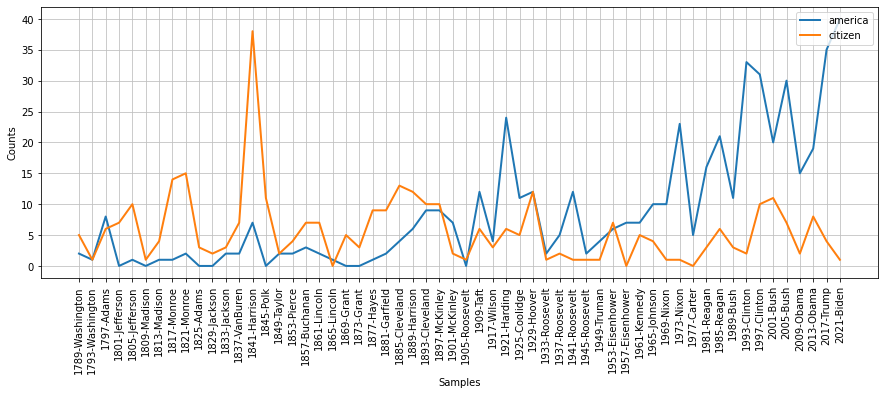

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
# !pip install matplotlib

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

cfd1.plot()

<br><br>     
## **3. Tuple & List**

- `tuple` 장점 (불변객체):  

    - 변하지 않는 데이터 시퀀스를 만들 수 있다.  

    - 타인의 접근(변경)을 막는다.  
      ex) blue = 1, white = 2, ...  
        
    - 메모리 사용이 적다.  

- `list` 장점 (가변객체):
    - 튜플의 장점이 필요없을 때 리스트를 사용한다.  

    - 데이터를 순차적으로 파악할 때 사용
    - 중복 데이터를 쓰는 것이 가능하다. (vs. set)

### **# 자료형 생성**

In [43]:
# 빈 자료형 선언 방식

emptyTuple = ()
emptyTuple = tuple()

emptyList = []
emptyList = list()

print(emptyTuple)
print(emptyList, end='\n\n')

()
[]



In [44]:
# 요소 여러개를 선언

alphabetT_1 = ('a', 'b')
alphabetT_2 = 'a', 'b' # 편해서 더 자주 쓰임

print(alphabetT_1)
print(alphabetT_2, end='\n\n')

('a', 'b')
('a', 'b')



In [66]:
# 요소가 1개일 때

alphaT = ('a')       # 하나일 때는 튜플로 인식하지 않는다.
print(alphaT, '\t', type(alphaT))


betaT = ('b', )      # 콤마(,) 를 찍어야 튜플로 인식한다.
print(betaT, type(betaT), end='\n\n')

a 	 <class 'str'>
('b',) <class 'tuple'>



ㅤ        
### **# Packing, Unpacking**

- `packing`: 한 변수에 여러 데이터를 할당하는 것.
    - list, tuple 자체를 의미.
    - a = [1,2,3,4]  


- `unpacking`: 여러 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것  
    - a, b, c = 'kim'
    - a = 'k' , b = 'i', c = 'm'

In [73]:
# Unpacking
a, b, c = 'hat'
a, b, c

('h', 'a', 't')

ㅤ        
### **# 값 교환**

In [92]:
# 값 교환하기

pwd = 'clank'
userId = 'ratchet'

''' 임시 배열을 둬서 원본 데이터를 보존
temp1 = userId
temp2 = pwd
pwd = temp1
userId = temp2
'''

# Python에서 가능
pwd, userId = userId, pwd
print(pwd, userId)


ratchet clank


ㅤ        
### **# 튜플 - 연산**

In [93]:
# 튜플의 연산

new_a = ('a',) + (1,2)
print(new_a)

numT = (1,2) * 3
print(numT, end='\n\n')

x = ('a',)
y = (1, 2)
print('x   :', id(x)) 
print('x+y :', id(x + y))     # 새로운 변수에 할당이 되는 것을 확인 가능하다


('a', 1, 2)
(1, 2, 1, 2, 1, 2)

x   : 1782003040656
x+y : 1782003057088


ㅤ        
### **# 튜플 - 비교**

In [100]:
x = 1, 2
y = 1, 6

a = 3, 1
b = 2, 4

print(f'x < y : {x < y}')      # 첫번째 인자부터 비교를 한다
print(f'a < b : {a < b}')


x < y : True
a < b : False


ㅤ        
### **# 튜플 - 순회**

In [103]:
# for문 순회

flavorT = 'chocolate', 'vanilla', 'mint'
for i in flavorT:
    print(i)

chocolate
vanilla
mint


ㅤ        
### **# 튜플 - Slicing**

In [126]:
# 리스트와 동일하게 튜플도 slicing이 가능하다.

flavorT[1]

'vanilla'

ㅤ        
### **# 튜플 - List Comprehension?**
- tuple comprehension은 존재하지 않는다.  

- 리스트로 바꿔서 하는 것은 가능.

In [115]:
# 1. 리스트 컴프리헨션을 취한 후 다시 튜플로 형 변환

print(tuple([i for i in flavorT]))


# 2. 1번 방식보다 느리다.

tempT = *[i for i in flavorT],
print(tempT)

('chocolate', 'vanilla', 'mint')
('chocolate', 'vanilla', 'mint')


ㅤ        
### **# 튜플 - 형 변환**

In [124]:
# 형 변환 주의점
dog = 'dog'

# 1.1. 스트링의 각 철자를 튜플의 요소로 넣는다.
print(tuple(dog))

# 1.2. 전체를 튜플로 변환
print((dog,))

print()

# 2.1. 리스트도 동일한 원리를 따른다.
print(list(dog))

# 2.2.
print([dog])

('d', 'o', 'g')
('dog',)

['d', 'o', 'g']
['dog']


<br><br>
## **4. List의 유용한 함수들**

- 변경, 삭제, 추가와 관련된 함수들  

- 리스트 컴프리헨션 업그레이드

## 생성 / 추가

### **# `range()`**

In [135]:
# 리스트의 내용을 range 함수로 자동 생성

num = list(range(5))
num

[0, 1, 2, 3, 4]

ㅤ        
### **# `append()`**

In [155]:
# 마지막에 요소 추가 (하나만 추가할 수 있다.)

num = [0, 1, 2, 3, 4]

num.append(5)
print(num)


# 리스트 자체를 요소로써 추가 가능

x = [-1, -1, -1]    
num.append(x)
print(num)

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, [-1, -1, -1]]


ㅤ        
### **# `insert()`**

In [142]:
# insert(index, item)

num = [0, 1, 2, 3, 4, 5]

num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 5]

ㅤ        
### **# `extend()`**

In [157]:
# 리스트를 요소로써가 아닌 합치고 싶을 경우

num = [0, 1, 2, 3, 4, 5]
x = [-1, -1, -1]

num.extend(x)     # 리스트를 리스트로 확장
print(num, end='\n\n')

[0, 1, 2, 3, 4, 5, -1, -1, -1]



In [154]:
# extend()을 쓰지 않고 연산으로도 합치는 것이 가능

num = [0, 1, 2, 3, 4, 5]
x = [-1, -1, -1]

num += x
num

[0, 1, 2, 3, 4, 5, -1, -1, -1]

ㅤ        
## 변경

### **# Offset**

In [192]:
num = [0, 1, 2, 3, 4, 5]

num[0] = -1                 # 0번째 인덱스 변경
print(num, end='\n\n')

[-1, 1, 2, 3, 4, 5]



### **# Slicing**

In [194]:
num = [0, 1, 2, 3, 4, 5]

num[:3] = -1, -1, -1        # 3번째 인덱스 전까지 변경
print(num, end='\n\n')


num[:3] = 'why'             # 스트링이 언패킹되어 한 철자씩 리스트에 들어가게 된다.
print(num, end='\n\n')


num[:3] = ['why']           # 언패킹 방지
print(num)

[-1, -1, -1, 3, 4, 5]

['w', 'h', 'y', 3, 4, 5]

['why', 3, 4, 5]


ㅤ        
## 삭제

### **# `del`**

In [197]:
num = [0, 1, 2, 3, 4, 5]

del num[:3]
num

[3, 4, 5]

ㅤ        
### **# `remove()`**

In [201]:
# remove(value)

num = [0, 1, 2, 3, 4, 5]

num.remove(1)
num

[0, 2, 3, 4, 5]

ㅤ        
### **# `pop()`**

In [205]:
# pop(index) : 기본값은 -1

num = [-1, 0, 1, 2, 3, 4, 5]

num.pop()
print(num)

num.pop(2)
print(num)

[-1, 0, 1, 2, 3, 4]
[-1, 0, 2, 3, 4]


ㅤ        
### **# `clear()`**

In [206]:
num = [-1, 0, 1, 2, 3, 4, 5]

num.clear()
num

[]

ㅤ        
## 탐색

### **# `index()`**

In [223]:
# index(value) 

num = list(range(1,6))
print(num)

num.index(4)    # 해당 value가 위치하는 index 반환

                # cf) find() -> 문자열만가능

[1, 2, 3, 4, 5]


3

### **# `in`**

In [225]:
# 특정 요소가 존재하는지 파악

num = [1, 2, 3, 4, 5]

0 in num

False

ㅤ        
## 정렬

### **# `sorted()`**

In [234]:
num = [2, 3, 4, 1, 5]

sorted(num, reverse = True)  # 변한 값만 복사해서 출력, 할당이 필요하다.

[5, 4, 3, 2, 1]

### **# `.sort()`**

In [235]:
num = [2, 3, 4, 1, 5]

num.sort(reverse=True)        # 리스트.sort(), 값을 할당하지 않아도 된다.
num

[5, 4, 3, 2, 1]

ㅤ        
## 순서 변경

### **# `reversed()`**

In [245]:
# 값을 반환하지 않는다.

num = [2, 3, 4, 1, 5]
print(reversed(num))
print(list(reversed(num)))

[5, 1, 4, 3, 2]


### **# `.reverse()`**

In [243]:
num = [2, 3, 4, 1, 5]

num.reverse()
num

[5, 1, 4, 3, 2]

ㅤ        
## 참조 / 복사

### **# 같은 메모리 주소 공유**

In [253]:
a = list(range(1,5))
print(a)

b = a  # 메모리 주소를 참조하는 것을 의미한다.
b[0] = 6

print('a :', a, id(a))
print('b :', b, id(b))

[1, 2, 3, 4]
a : [6, 2, 3, 4] 1781998063936
b : [6, 2, 3, 4] 1781998063936


ㅤ        
### **# `.copy()`**: shallow copy

In [277]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 얕은 복사
a = [1, 2, 3, 4]

b = a
#=================
c = a.copy()
d = list(a)
e = a[:]

print(f'''
a: {id(a)}
b: {id(b)}

c: {id(c)}
d: {id(d)}
e: {id(e)}
''')


a: 1781998033280
b: 1781998033280

c: 1781998034304
d: 1781998507264
e: 1781997992000



In [275]:
# shallow copy라고 불리는 이유: 리스트 안 요소가 가변 객체일 경우

a = [1, 2, 3, 4]
a.append([6, 6, 6])
print('a:', a, end='\n\n')

# 주소는 다르게 할당받는다.
f = a.copy()
print('a:', id(a))
print('f:', id(f))
print()

# 내용물은 같이 변한다.
f[-1][1] = 0
print('f[-1][1] = 0')

print('a:', a)
print('f:', f)

a: [1, 2, 3, 4, [6, 6, 6]]

a: 1781998383360
f: 1781998063936

f[-1][1] = 0
a: [1, 2, 3, 4, [6, 0, 6]]
f: [1, 2, 3, 4, [6, 0, 6]]


ㅤ        
### **# `.deepcopy()`**

In [286]:
# 복사한 리스트의 내용을 변경해도 원본 리스트는 변경되지 않는다.

import copy

a = [1, 2, 3, 4, [6, 6, 6]]
g = copy.deepcopy(a)

print('a :', a, id(a))
print('g :', g, id(g))
print()

g[-1][1] = 0
print('g[-1][1] = 0')

print('a :', a, id(a))
print('g :', g, id(g))

a : [1, 2, 3, 4, [6, 6, 6]] 1781998020736
g : [1, 2, 3, 4, [6, 6, 6]] 1781998021504

g[-1][1] = 0
a : [1, 2, 3, 4, [6, 6, 6]] 1781998020736
g : [1, 2, 3, 4, [6, 0, 6]] 1781998021504


ㅤ        
## 순회

### **# `enumerate()`**

In [305]:
# 리스트 + 인덱스 enumerate

nameList = ['kate', 'royce', 'phill']

for idx, item in enumerate(nameList):
    print(idx, item)

0 kate
1 royce
2 phill


ㅤ        
### **# `zip()`**

In [304]:
# 여러 리스트를 동시에 순회
# 짧은 리스트를 기준으로 순회

nameList = ['kate', 'royce', 'phill']
ageList = [77, 44, 54]

# (name, age)
for name, age in zip(nameList, ageList):   
    print(name, age)

print()

kate 77
royce 44
phill 54



In [295]:
# for문 순회와의 차이 : 동시에 순회하지를 못한다.

for name in nameList:
    for age in ageList:
        print((name,age))

print()

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)



In [308]:
# zip을 이용해서 바로 리스트로 가져갈 수 있다.

name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

identity = list(zip(name, age))
identity

[('kate', 77), ('royce', 44), ('phill', 54)]

ㅤ        
## **5. List Comprehension ~**

### **# List Comprehension O**

In [332]:
nameList = ['kate', 'royce', 'phill']
ageList = [77, 44, 54]

[(name, age) for name, age in zip(nameList, ageList)]

[('kate', 77), ('royce', 44), ('phill', 54)]

ㅤ        
### **# List Comprehension X**

In [322]:
people = []
for name, age in zip(nameList, ageList):
    people.append((name, age))
    
print(people)

[('kate', 77), ('royce', 44), ('phill', 54)]


ㅤ        
### # Quiz 1
- for 문의 리스트 컴프리헨션을 바꿔보기  

    `for i in nameList:`  
    ㅤㅤ`for j in ageList:`  
    ㅤㅤㅤㅤ`print((i,j))`


In [334]:
[(i,j) for i in nameList for j in ageList]

[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]

ㅤ        
### # Quiz 2
- [ i, j ] 리스트의 리스트로 바꿔보기 (리스트 컴프리헨션)


- 원하는 출력 결과:  

 
    [ [('kate', 77), ('royce', 77), ('phill', 77)],  
    [('kate', 44), ('royce', 44), ('phill', 44)],  
    [('kate', 54), ('royce', 54), ('phill', 54)] ]  


In [342]:
[
    [(i,j) for i in nameList] for j in ageList
]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]

ㅤ        
### # Quiz 3
- sentence = "do not judge a book by its cover"
- [ (대문자, 첫글자 대문자, 글자수), ... ] 리스트 만들기

In [347]:
sentence = "do not judge a book by its cover"

[
    (word.upper(), word.capitalize(), len(word)) for word in sentence.split()
]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

ㅤ        
### # Quiz 4
- text = [  
    ㅤ ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],  
    ㅤ ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']  
]  

1. 문장마다 스트링으로 변화해서 리스트로 변환
    - ['문장1', '문장2']  
ㅤ  
2. 전체를 스트링으로 반환  
    - '문장1 문장2'  
ㅤ  
3. 전체 단어 리스트 가져오기  

In [349]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

In [377]:
# 1.
sentList = [' '.join(words) for words in text]
print(sentList, end='\n\n')


# 2.
singleString = ' '.join(sentList)
print(singleString, end='\n\n')


# 3.
wordList = [word for sent in text for word in sent]

'''
wordList = [
    word 
    for sent in sentList 
    for word in sent.split()
]
'''
print(wordList)

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

Sunja said goodnight to her mother Hansu was no longer in Busan

['Sunja', 'said', 'goodnight', 'to', 'her', 'mother', 'Hansu', 'was', 'no', 'longer', 'in', 'Busan']


ㅤ     
ㅤ        
### **# List Comprehension : 조건문**

### # Quiz 1
- 짝수만 가져오고, 홀수일 경우 '홀수'라고 출력  
[i for i in range(10)]  

In [381]:
# WRONG
# [i for i in range(10) if i % 2 == 0 else '홀수']  

# CORRECT
[i if i % 2 == 0 else '홀수' for i in range(10)]      # 앞으로 끌고 온다.

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']